In [3]:
# Load all packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import *
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
import lightgbm
%matplotlib inline

In [4]:
hotel = pd.read_csv('D:\Jupyter_Notebook\Hotel_Cancellation\data\hotel_featured.csv')

### Logistic Regression

In [5]:
X = hotel[['lead_time', 'adr','previous_cancellations','arrival_date_month_number', 'stays_in_weekend_nights','stays_in_week_nights',
       'booking_changes', 'total_of_special_requests', 'country_0','country_1', 'country_2', 'country_3', 'country_4', 'country_5',       
       'country_6', 'country_7']]
y = hotel['is_canceled']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [7]:
# Use MinMaxScaler to scale data into range (0,1), not using StandardScale here because many columns should not contain negative values
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train) 
X_train = pd.DataFrame(X_train,columns=X.columns)

X_test=scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=X.columns)

In [8]:
clf = LogisticRegression(C=0.001, random_state = 1)
# Fit the model on the trainng data.
clf.fit(X_train, y_train)
# Print the accuracy from the testing data.

y_pred_lr = clf.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_lr)
logistic_precision = precision_score(y_test, y_pred_lr)  
print('logistic regression accuracy_score: ',logistic_accuracy)
print('logistic regression precision_score: ',logistic_precision)
cm = confusion_matrix(y_test, y_pred_lr,normalize='true')
lg_true_positive = cm[1][1]
print('logistic regression true positive rate: ',lg_true_positive)

logistic regression accuracy_score:  0.761848838184716
logistic regression precision_score:  0.8115079365079365
logistic regression true positive rate:  0.4638239963710592


<Figure size 432x288 with 0 Axes>

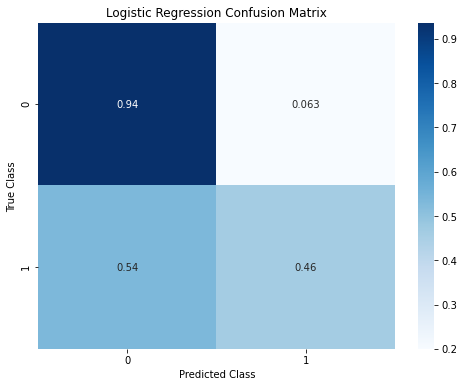

In [9]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, y_pred_lr,normalize='true')
labels = ['0', '1']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues", vmin = 0.2);
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show();

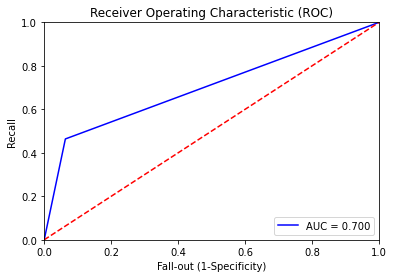

Logistic Regression AUC score: 0.7002959172483624


In [10]:
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc_logistic = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc_logistic)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('Logistic Regression AUC score:', roc_auc_logistic)

### Random Forest

In [11]:
X = hotel.drop(columns=['is_canceled'])
y = hotel['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train) 
X_train = pd.DataFrame(X_train,columns=X.columns)

X_test=scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=X.columns)

In [12]:
rf = RandomForestClassifier(n_estimators=200,random_state=1)
model_res = rf.fit(X_train, y_train)
y_pred_rf = model_res.predict(X_test)

In [13]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision =  precision_score(y_test, y_pred_rf)  

print('Random Forest accuracy_score: ',rf_accuracy)
print('Random Forest precision_score: ', rf_precision)

cm = confusion_matrix(y_test, y_pred_rf,normalize='true')
rf_true_positive = cm[1][1]
print('Random Forest true positive rate: ',rf_true_positive)

Random Forest accuracy_score:  0.8835248720744904
Random Forest precision_score:  0.8800805335346672
Random Forest true positive rate:  0.7931503742345203


In [14]:
print("Classification Report")
print(classification_report(y_test, y_pred_rf))

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     15024
           1       0.88      0.79      0.83      8818

    accuracy                           0.88     23842
   macro avg       0.88      0.86      0.87     23842
weighted avg       0.88      0.88      0.88     23842



<Figure size 432x288 with 0 Axes>

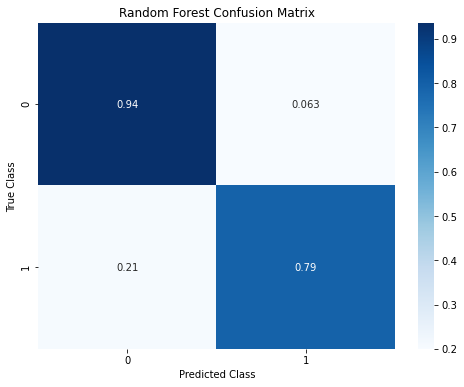

In [15]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, y_pred_rf,normalize='true')
labels = ['0', '1']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues", vmin = 0.2);
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show();

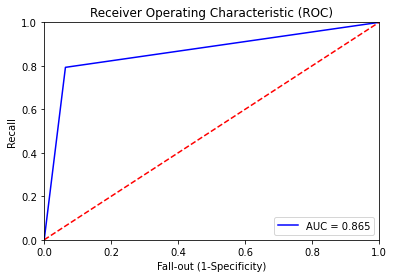

Random Forest AUC score: 0.8648592659245019


In [16]:
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc_rf)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('Random Forest AUC score:', roc_auc_rf)


### Gradient Boosting

In [17]:
X = hotel.drop(columns=['is_canceled'])
y = hotel['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train) 
X_train = pd.DataFrame(X_train,columns=X.columns)

X_test=scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=X.columns)

In [18]:
params= {'lambda_l1': 0.030374081987085574,
         'lambda_l2': 0.005970794054396023,
         'max_depth': 59,
         'min_child_samples': 4398,
         'min_data_in_leaf': 107,
         'num_leaves': 228}
params['metric'] = 'auc'

In [19]:
lgtrain = lightgbm.Dataset(X_train, y_train)
lgbm = lightgbm.train(params,
                 lgtrain,
                 280,
                 #early_stopping_rounds= 40,
                 verbose_eval= 4
                 )

In [20]:
predictions_lgbm_prob = lgbm.predict(X_test)

In [21]:
# Set threshold to be 0.7, if probability larger than 0.7, then cancelled
predictions_lgbm_01 = np.where(predictions_lgbm_prob > 0.7, 1, 0)

<Figure size 432x288 with 0 Axes>

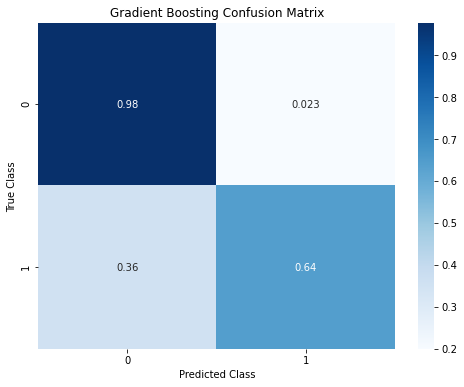

In [22]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions_lgbm_01,normalize='true')
labels = ['0', '1']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues", vmin = 0.2);
plt.title('Gradient Boosting Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show();

In [23]:
gradient_accuracy = accuracy_score(y_test, predictions_lgbm_01)
gradient_precision =  precision_score(y_test, predictions_lgbm_01)                     
print('Gradient Boosting accuracy_score: ',gradient_accuracy)
print('Gradient Boosting precision_score: ', gradient_precision)

gb_true_positive = cm[1][1]
print('Gradient Boosting true positive rate: ',gb_true_positive)

Gradient Boosting accuracy_score:  0.8539971478902777
Gradient Boosting precision_score:  0.9430516353976424
Gradient Boosting true positive rate:  0.6441369925153096


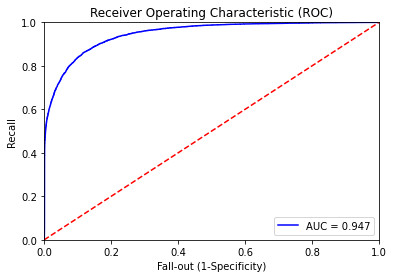

Gradient Boosting AUC score: 0.9473750746065689


In [24]:
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_lgbm_prob)
roc_auc_gb = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc_gb)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('Gradient Boosting AUC score:', roc_auc_gb)


### Model Selection

Gradient Boosting should be our best model in this problem.

The Logistic Regression model does not perform so well. Logistic regression model only correctly identifies 46% of cancellation. And only 81% of the positive prediction is correct. The True positive rate is very low (0.46), and the precision is not high enough. Compared to the other two models, Logistic Regression is not a good choice for this problem.

The Random Forest model. 79% of cancellations are correctly identified and 88% of the positive prediction is correct. 
Although this model has the highest score on the True Positive rate, the precision rate is still not high enough compared to the Gradient Boosting model. Since precision is the key metric that we should focus on this problem, Random Forest is still not the best model to choose from.

The Gradient model performs the best overall. It has the highest AUC score and the precision. we can see that 64% cancellation is correctly identified. The precision is 94%, meaning that 94% of the positive prediction is correct. This model can help us correctly identify which orders are more likely to be canceled, so we can process certain policies to such orders.


In [25]:
pd.DataFrame({"Model":['Logistic Regression.', "Random Forest", "Gradient Boosting"],
              "Accuracy":[round(logistic_accuracy,2), round(rf_accuracy,2), round(gradient_accuracy,2)],
             "AUC": [round(roc_auc_logistic,2), round(roc_auc_rf,2), round(roc_auc_gb,2)],
             'Tru Positive Rate': [round(lg_true_positive,2), round(rf_true_positive,2), round(gb_true_positive,2)],
             'Precision': [round(logistic_precision,2), round(rf_precision,2), round(gradient_precision,2)]})

,Model,Accuracy,AUC,Tru Positive Rate,Precision
0,Logistic Regression.,0.76,0.70,0.46,0.81
1,Random Forest,0.88,0.86,0.79,0.88
2,Gradient Boosting,0.85,0.95,0.64,0.94


#### Final Model Feature Importance

The lead_time has the biggest effect on the cancellation. This seems reasonable that, as the number of days that elapsed between the entering date of the booking into the PMS and the arrival date gets longer, the customers are more likely to cancel the order. The second important feature is the average daily rate. As the adr goes higher, customers are more likely to cancel the order. The hotel owner could look into it and figure out why this is happening. We definitely do not want customers to cancel high pricing rooms.

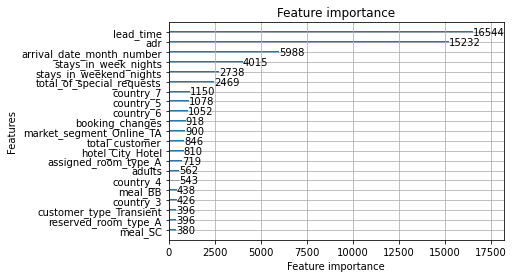

In [26]:
lightgbm.plot_importance(lgbm, max_num_features=21, importance_type='split')
plt.savefig('D:/Jupyter_Notebook/Hotel_Cancellation/figs/feature_importance.png')

#### Lead_time

In [92]:
prediction_X_train = lgbm.predict(X_train)
prediction_X_train = pd.DataFrame(prediction_X_train,columns=["prob_pred"])

In [93]:
predicted = pd.concat([X_train,prediction_X_train],axis=1)

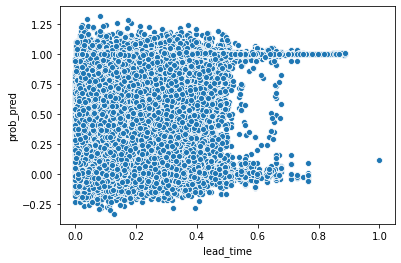

In [94]:
# relationship between leadtime and cancellation
lead = predicted[['lead_time','prob_pred']]
sns.scatterplot(x='lead_time',y='prob_pred',data=lead)

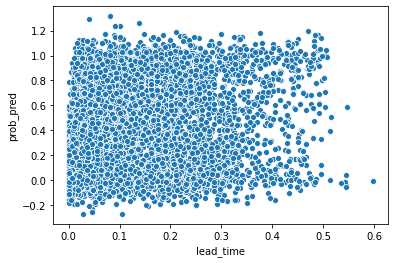

In [95]:
family_lead = predicted[predicted['family']==1][['lead_time','prob_pred']]
sns.scatterplot(x='lead_time',y='prob_pred',data=family_lead)

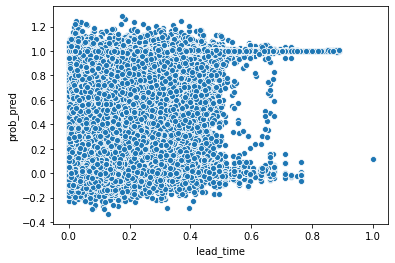

In [96]:
nonfamily_lead = predicted[predicted['family']==0][['lead_time','prob_pred']]
sns.scatterplot(x='lead_time',y='prob_pred',data=nonfamily_lead)

#### Adr

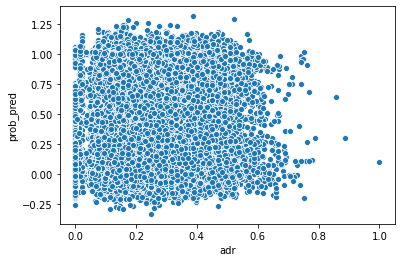

In [97]:
# relationship between leadtime and cancellation
adr = predicted[['adr','prob_pred']]
sns.scatterplot(x='adr',y='prob_pred',data=adr)